In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [214]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [216]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [218]:
df = df[['v1', 'v2']]
df.columns = ['Label', 'Message']


In [220]:
df.head

<bound method NDFrame.head of      Label                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [222]:
df.dropna(inplace=True)

C:\Users\gunak\AppData\Local\Temp\ipykernel_9660\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [224]:
df = df[df['Label'].isin(['ham', 'spam'])]  # keep only ham and spam
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})  # map labels
df['Label'] = df['Label'].astype(int)  # ensure numeric labels

In [226]:
df

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [228]:
df['Message_Length'] = df['Message'].apply(len)

In [230]:
df

,Label,Message,Message_Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [232]:
print("✅ Unique labels:", df['Label'].unique())
print("✅ Label data type:", df['Label'].dtype)


✅ Unique labels: [0 1]
✅ Label data type: int32


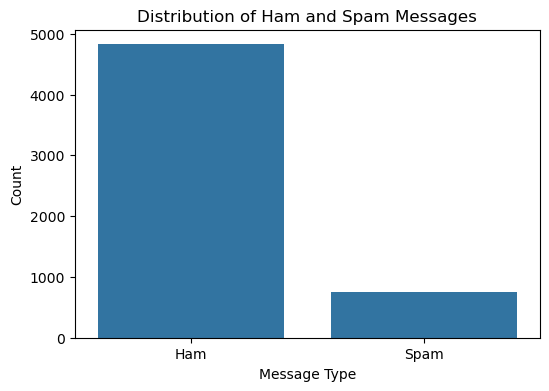

In [234]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title("Distribution of Ham and Spam Messages")
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

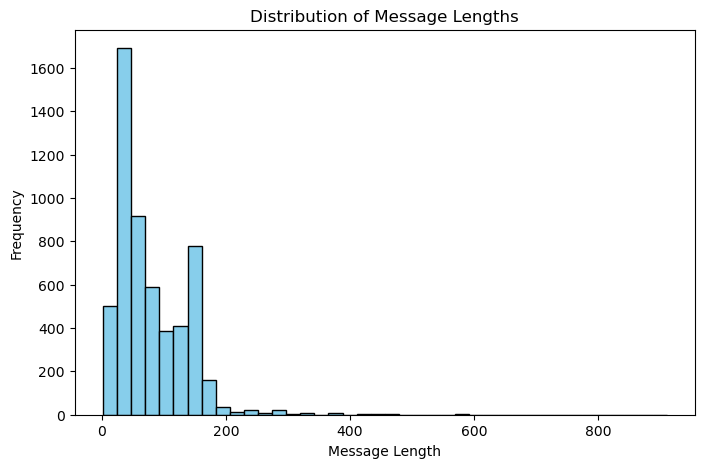

In [236]:
plt.figure(figsize=(8, 5))
plt.hist(df['Message_Length'], bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

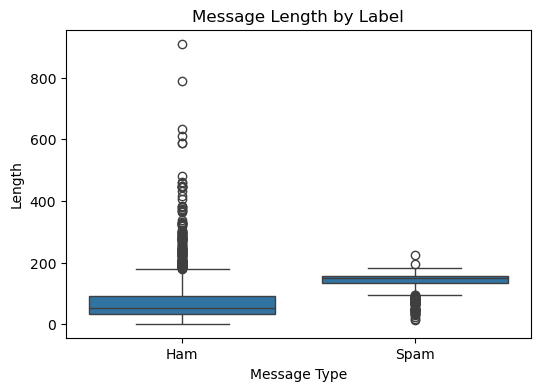

In [238]:
# 3. Boxplot of message length by label
plt.figure(figsize=(6, 4))
sns.boxplot(x='Label', y='Message_Length', data=df)
plt.title("Message Length by Label")
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.xlabel("Message Type")
plt.ylabel("Length")
plt.show()

In [240]:
X = df['Message']
y = df['Label']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [244]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [246]:
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [247]:
y_pred = model.predict(X_test_tfidf)

In [249]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [252]:
print("\nEvaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Evaluation Results:
Accuracy: 0.979372197309417
Confusion Matrix:
 [[961   4]
 [ 19 131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

